In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from parse import parse

from alphaMusic.utils.fls_utils import load_from_pkl
import alphaMusic.evaluation as evl

In [3]:
sns.set()
sns.set_context("paper")
cste = 18
params = {
    'backend': 'ps',
    'axes.labelsize': cste,
    'axes.titlesize': cste,
    'font.size': cste,
    'legend.fontsize': cste,
    'xtick.labelsize': cste,
    'ytick.labelsize': cste,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'ptmrr8re',
}

sns.set_style("whitegrid", {
    'pgf.texsystem': 'xelatex',  # pdflatex, xelatex, lualatex
    'text.usetex': True,
    'font.family': 'serif',
    'axes.labelsize': cste,
    'axes.titlesize': cste,
    'font.size': cste,
    'legend.fontsize': cste,
    'xtick.labelsize': cste,
    'ytick.labelsize': cste,
    'font.serif': [],
    'lines.linewidth':1.5,
})
plt.rcParams.update(params)

pal = sns.cubehelix_palette(7, start=0.5, rot=-0.5,dark=0.3, light=.75, reverse=True, hue=1.)

fig_width_pt = 700.6937  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0 / 72.27               # Convert pt to inch
golden_mean = (np.sqrt(5) - 1.0) / 2.0         # Aesthetic ratio
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width * golden_mean      # height in inches
fig_size = np.array([fig_width, fig_height])

In [4]:
path_to_results = Path('..','recipes','EUSIPCO22','results')
assert path_to_results.exists()

files = path_to_results.glob('N:180_RT60:0.5*DRR:sweep*.pkl')
exp_name = 'N:{n_samples}_RT60:{rt60_name}_SNR:{snr_name}_DRR:{drr_name}_nsrcs:{n_srcs}_nmics:{n_mics}_noise:{noise_type}'

results = pd.DataFrame()
for file in sorted(files):
    print(file)
    params = parse(exp_name,str(file.name))
    df = load_from_pkl(file)
    df['n_mics'] = int(params['n_mics'])
    df['n_srcs'] = int(params['n_srcs'])
    results = pd.concat([results, df], ignore_index=True)

../recipes/EUSIPCO22/results/N:180_RT60:0.5_SNR:10_DRR:sweep_nsrcs:1_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:0.5_SNR:10_DRR:sweep_nsrcs:2_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:0.5_SNR:10_DRR:sweep_nsrcs:3_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:0.5_SNR:10_DRR:sweep_nsrcs:4_nmics:4_noise:cafet_results.pkl


In [5]:
df = pd.DataFrame()

for r, row in results.iterrows():
    
    # compute metrics
    doas_est = row['DOAs_est']
    doas_ref = row['DOAs']
    
    metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
    
    df.at[r,'algo'] = row['algo']

    df.at[r,'MAE'] = metrics['MAE']
    df.at[r,'RMSE'] = metrics['RMSE']
    df.at[r,'ACC5'] = metrics['ACC5']
    df.at[r,'ACC10'] = metrics['ACC10']
    df.at[r,'MISS'] = metrics['MISS']
    
    # params
    df.at[r,'SNR'] = row['SNR']
    df.at[r,'RT60'] = row['RT60']
    df.at[r,'DRR'] = row['DRR']
    df.at[r,'n_mics'] = row['n_mics']
    df.at[r,'n_srcs'] = row['n_srcs']
    df.at[r,'alpha'] = row['alpha']
    df.at[r,'p'] = row['p']
    df.at[r,'time'] = row['time']
    
    if row['algo'] in ['aMUSIC', 'aNormMUSIC']:
        if row['alpha'] == 1.8:
            a = 'a=1.8'
        elif row['alpha'] == 1.5:
            a = 'a=1.5'
        else:
            a = 'a=est'
        if row['p'] == 1.5:
            p = 'p=1.5'
        elif row['p'] == 1:
            p = 'p=1'
        df.at[r,'sub_algo'] = f"{row['algo']}_{a}_{p}"
    if row['algo'] in ['MUSIC', 'NormMUSIC']:
        df.at[r,'sub_algo'] = f"a{row['algo']}_2"

In [6]:
df

,algo,MAE,RMSE,ACC5,ACC10,MISS,SNR,RT60,DRR,n_mics,n_srcs,alpha,p,time,sub_algo
0,MUSIC,22.000000,22.000000,0.0,0.000000,0.0,10.0,0.5,1.5,4.0,1.0,NaN,NaN,0.034519,aMUSIC_2
1,aMUSIC,4.000000,4.000000,100.0,100.000000,0.0,10.0,0.5,1.5,4.0,1.0,1.484762,1.5,0.059225,aMUSIC_a=est_p=1.5
2,NormMUSIC,2.000000,2.000000,100.0,100.000000,0.0,10.0,0.5,1.5,4.0,1.0,NaN,NaN,0.029068,aNormMUSIC_2
3,aNormMUSIC,0.000000,0.000000,100.0,100.000000,0.0,10.0,0.5,1.5,4.0,1.0,1.472589,1.5,0.038655,aNormMUSIC_a=est_p=1.5
4,SRP_PHAT,10.000000,10.000000,0.0,0.000000,0.0,10.0,0.5,1.5,4.0,1.0,NaN,NaN,0.028656,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,MUSIC,12.000000,13.874437,25.0,50.000000,0.0,10.0,0.5,1.5,4.0,4.0,NaN,NaN,0.015266,aMUSIC_2
7196,aMUSIC,17.000000,19.222383,0.0,25.000000,0.0,10.0,0.5,1.5,4.0,4.0,1.563855,1.5,0.036032,aMUSIC_a=est_p=1.5
7197,NormMUSIC,13.250000,16.635805,25.0,50.000000,0.0,10.0,0.5,1.5,4.0,4.0,NaN,NaN,0.014951,aNormMUSIC_2
7198,aNormMUSIC,14.500000,19.209373,25.0,50.000000,0.0,10.0,0.5,1.5,4.0,4.0,1.574482,1.5,0.036223,aNormMUSIC_a=est_p=1.5


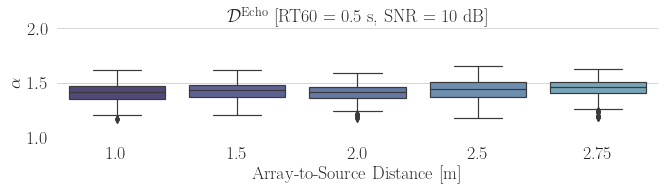

In [7]:
plt.figure(figsize=(fig_size[0], fig_size[1]/2))
plt.title(r'$\mathcal{D}^\mathrm{Echo}$  ' + '[RT60 = 0.5 s, SNR = 10 dB]')
sns.boxplot(x='DRR', y='alpha',
            data=df.loc[(df['algo'] == 'aMUSIC') & 
                        (df['alpha'] != 1.5) & (df['alpha'] != 1.8)
                       ],
           palette=pal)
sns.despine(trim=False, left=True, bottom=True)
plt.ylim((1,2))
plt.ylabel(r'$\alpha$')
plt.xlabel('Array-to-Source Distance [m]')
plt.tight_layout()
plt.savefig('../recipes/EUSIPCO22/figures/alpha_DRR.pdf',dpi=300)
plt.show()

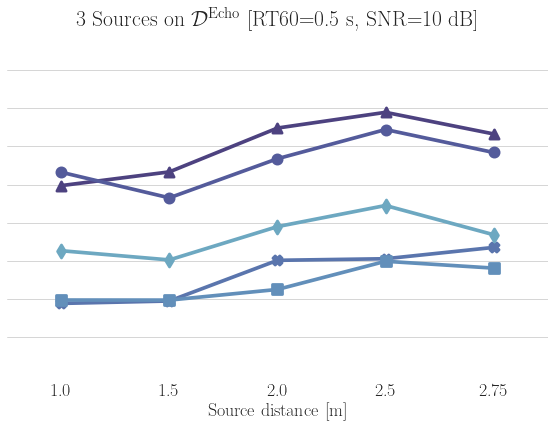

In [18]:
curr_df = df.loc[((df['alpha'] != 1.5) | (df['alpha'] != 1.8)) & (df['p'] != 1)]

for n_srcs in [3]:
    plt.figure(figsize=(0.8*fig_size[0], fig_size[1]))
    plt.suptitle(f'{n_srcs} Sources on '+ r'$\mathcal{D}^\mathrm{Echo}$ [RT60=0.5 s, SNR=10 dB]')
    g = sns.pointplot(x='DRR', y='MAE', hue='algo', 
                  palette=pal,
                  data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
                  hue_order=['MUSIC','aMUSIC','NormMUSIC','aNormMUSIC','SRP_PHAT'],
                  markers=['^','o','X','s','d','v','*'],
                  ci=None,
                  scale=1.7,
    )
    plt.ylim([0,22])
    plt.ylabel('Angular Error [$^\circ$]\n' + r'($\leftarrow$ the lower, the better)')
    plt.xlabel('Source distance [m]')
    g.set_ylabel('')
    g.axes.yaxis.set_ticklabels([])
    g.get_legend().set_visible(False)
    sns.despine(offset=10, trim=False, left=True, bottom=True)
    plt.tight_layout(pad=0.5)
    
plt.savefig('../recipes/EUSIPCO22/figures/mae_acc_3srcs_DRR.pdf',dpi=300)
plt.show()

In [ ]:
# curr_df = df.loc[((df['alpha'] != 1.5) | (df['alpha'] != 1.8)) & (df['p'] != 1)]

# for n_srcs in [3]:
#     plt.figure(figsize=(10,5))
#     plt.suptitle(f'{n_srcs} Sources, RT60=0.5 s, SNR=10 dB')
#     plt.subplot(121)
#     sns.pointplot(x='DRR', y='MAE', hue='algo', 
#                   palette=pal,
#                   data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
#                   markers=['^','o','X','s','d','v','*'],
#                   ci=None
#     )
#     plt.ylim([0,25])
#     plt.ylabel('Angular Error [$^\circ$]\n' + r'($\leftarrow$ the lower, the better)')
#     plt.xlabel('Source distance [m]')
    
#     plt.subplot(122)
#     sns.barplot(x='DRR', y='ACC5', hue='algo', 
#                 palette=pal,
#                 data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
#     )
#     plt.ylim([0,100])
#     plt.ylabel('Accurancy < 5$^\circ$ [$\%$]\n'+ r'(the higher, the better $\rightarrow$)')
#     plt.xlabel('Source distance [m]')
#     sns.despine(offset=10, trim=False, left=True, bottom=True)
#     plt.tight_layout(pad=0.5)
# plt.savefig('../recipes/EUSIPCO22/figures/mae_acc_3srcs_DRR.pdf',dpi=300)
# plt.show()

In [ ]:
# for n_srcs in [1,2,3,4]:
#     plt.figure(figsize=(20,5))
#     plt.subplot(131)
#     plt.title(f'n_srcs {n_srcs}')
#     sns.pointplot(x='DRR', y='MAE', hue='algo', 
#                   palette=pal,
#                   data=df.loc[df['n_srcs'] == n_srcs],
#                   markers=['^','o','X','s','d','v','*'],
#                   ci=None
#     )
#     plt.subplot(132)
#     sns.barplot(x='DRR', y='ACC5', hue='algo', 
#                 palette=pal,
#                 data=df.loc[df['n_srcs'] == n_srcs],
#     )
#     plt.subplot(133)
#     sns.barplot(x='DRR', y='MISS', hue='algo', 
#                 palette=pal,
#                 data=df.loc[df['n_srcs'] == n_srcs],
#     )
    
#     plt.tight_layout()